In [82]:
#!pip install numpy pandas matplotlib seaborn sklearn lightgbm xgboost catboost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error, r2_score,mean_absolute_percentage_error

In [5]:
data = pd.read_csv(r"Desktop\CARPRICEPREDICTOR\model\car.csv")
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


#### Basic EDA

In [6]:
# Check the shape of data
data.shape

(301, 9)

In [7]:
# Check column names of the data
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [8]:
# Check for missing values
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [9]:
# check for the datatypes amd other info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
# check the statistics of data
print(data.describe())

              Year  Present_Price     Kms_Driven       Owner  Selling_Price
count   301.000000     301.000000     301.000000  301.000000     301.000000
mean   2013.627907       7.628472   36947.205980    0.043189       4.661296
std       2.891554       8.644115   38886.883882    0.247915       5.082812
min    2003.000000       0.320000     500.000000    0.000000       0.100000
25%    2012.000000       1.200000   15000.000000    0.000000       0.900000
50%    2014.000000       6.400000   32000.000000    0.000000       3.600000
75%    2016.000000       9.900000   48767.000000    0.000000       6.000000
max    2018.000000      92.600000  500000.000000    3.000000      35.000000


In [15]:
# lets see the Correlation between the features
print(data.corr(numeric_only=True))

                   Year  Present_Price  Kms_Driven     Owner  Selling_Price
Year           1.000000      -0.047584   -0.524342 -0.182104       0.236141
Present_Price -0.047584       1.000000    0.203647  0.008057       0.878983
Kms_Driven    -0.524342       0.203647    1.000000  0.089216       0.029187
Owner         -0.182104       0.008057    0.089216  1.000000      -0.088344
Selling_Price  0.236141       0.878983    0.029187 -0.088344       1.000000


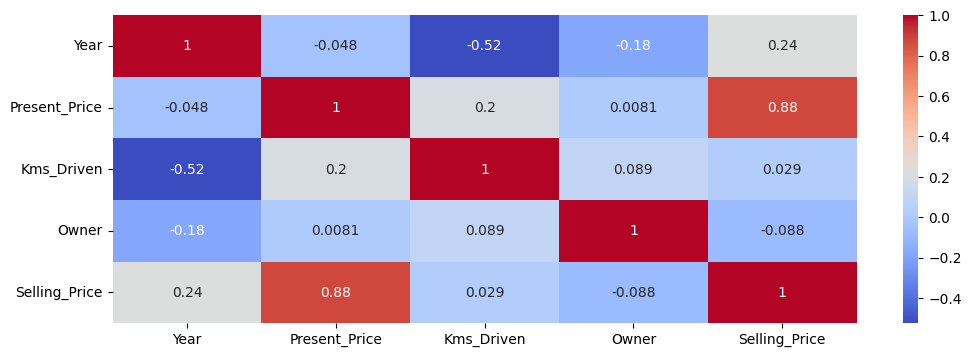

In [17]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
correlations = data.corr(numeric_only=True)
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

#### Basic Preprocessing

In [18]:
# Lets encode the text features using Label Encoding
le = LabelEncoder()
data['Fuel_Type'] = le.fit_transform(data.Fuel_Type.values)
data['Transmission'] = le.fit_transform(data.Transmission.values)
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,2,Dealer,1,0,3.35
1,sx4,2013,9.54,43000,1,Dealer,1,0,4.75
2,ciaz,2017,9.85,6900,2,Dealer,1,0,7.25
3,wagon r,2011,4.15,5200,2,Dealer,1,0,2.85
4,swift,2014,6.87,42450,1,Dealer,1,0,4.60


In [19]:
#Petrol=2, Diesel=1, CNG=0
data.Fuel_Type.unique()

array([2, 1, 0])

In [20]:
#Manual=1, Automatic=0
data.Transmission.unique()

array([1, 0])

In [23]:
#First=0, Second=1, Fourth=3
data.Owner.unique()

array([0, 1, 3], dtype=int64)

In [24]:
# Target column is Selling Price
predict = "Selling_Price"
data = data[["Year", "Kms_Driven", 
             "Present_Price", "Fuel_Type", "Transmission", 
             "Owner", "Selling_Price"]]

In [26]:
# Split dataset into input (other than selling price) and output (Selling Price)
x = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

In [27]:
# Now split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Model Building

In [28]:
# Train all 7 models on x_train and y_train
lrmodel=LinearRegression().fit(x_train,y_train)
dt_model = DecisionTreeRegressor().fit(x_train,y_train)
rf_model=RandomForestRegressor().fit(x_train,y_train)
gbm_model=GradientBoostingRegressor().fit(x_train,y_train)
lgbm_model=LGBMRegressor().fit(x_train,y_train)
xgb_model= XGBRegressor().fit(x_train,y_train)
catb_model= CatBoostRegressor().fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 5
[LightGBM] [Info] Start training from score 4.617125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

#### Evaluating Models

In [30]:
# define function to evaluate all these 7 models
def evaluate_model(model,x_test,y_test):
    prediction=model.predict(x_test)
    print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
    print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,prediction))
    print("Mean Squared Error:",mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score:",r2_score(y_test,prediction))

In [31]:
# Lets evaluate these 7 models and see the results
print("LR_Model:")
print(evaluate_model(lrmodel,x_test,y_test))
print()
print("DT_Model:")
print(evaluate_model(dt_model,x_test,y_test))
print()
print("RF_Model:")
print(evaluate_model(rf_model,x_test,y_test))
print()
print("GBM_Model:")
print(evaluate_model(gbm_model,x_test,y_test))
print()
print("LGBM_Model:")
print(evaluate_model(lgbm_model,x_test,y_test))
print()
print("XGB_Model:")
print(evaluate_model(xgb_model,x_test,y_test))
print()
print("CatBoost_Model:")
print(evaluate_model(catb_model,x_test,y_test))

LR_Model:
Mean Absolute Error: 1.4361109630186981
Mean Absolute Percentage Error: 1.048956317344688
Mean Squared Error: 5.608914721093255
Root Mean Squared Error: 2.3683147428273243
R2 Score: 0.7919496379038967
None

DT_Model:
Mean Absolute Error: 0.8319672131147541
Mean Absolute Percentage Error: 0.22308551241815056
Mean Squared Error: 2.562840983606557
Root Mean Squared Error: 1.6008875612005227
R2 Score: 0.904937047334863
None

RF_Model:
Mean Absolute Error: 0.9823311475409838
Mean Absolute Percentage Error: 0.27485211560258854
Mean Squared Error: 5.175562924918033
Root Mean Squared Error: 2.274986357083935
R2 Score: 0.8080238701916855
None

GBM_Model:
Mean Absolute Error: 0.7968692116128581
Mean Absolute Percentage Error: 0.2502423796699266
Mean Squared Error: 2.914134083493904
Root Mean Squared Error: 1.7070835022030715
R2 Score: 0.8919066020049367
None

LGBM_Model:
Mean Absolute Error: 1.2239238634204437
Mean Absolute Percentage Error: 0.5258840501769194
Mean Squared Error: 6.087

#### Predictions

In [32]:
# From above result, as r2 is comparitely high in CatBoost Model,
# so we will finalize this model, also now Lets do the prediction for x_test data
predictions = catb_model.predict(x_test)
predictions


array([11.67308843,  4.29759855,  0.38047982,  2.56690477,  7.77723568,
        4.53101495,  5.64008865,  0.3038273 ,  4.55464627,  0.61938147,
        0.18208052,  2.50114256,  8.32531082,  1.64652324,  2.54935168,
        4.54939911, 10.8802753 ,  0.32581906,  6.748964  ,  4.1701371 ,
        4.53242689,  3.00573595,  0.03100836,  8.6017414 ,  1.53406807,
        1.11758007,  0.71276526, 19.80924689,  5.72442616,  0.58250252,
        0.28780194,  9.12499463,  2.70180908,  0.11797724,  6.75877973,
        1.66736253,  5.55885498,  6.55236376,  0.4341351 , 20.76963311,
        1.11600588,  4.18782164,  0.31602343,  5.38536552,  4.08662023,
        9.79642748,  4.73460373,  6.93659408,  4.09081249,  2.55568022,
        3.80626352,  0.03037368,  6.57588199,  4.19336488,  4.03477419,
        0.54456804,  4.72877956,  4.54408289,  9.365487  ,  9.25539445,
        7.41582641])

In [33]:
# Let's do the prediction new unknown data
input=[[2016,30000,6.87,1,1,0,0]]
price = catb_model.predict(input)
print(price.round(1)[0],"in Lakhs")

5.8 in Lakhs


#### Saving Models

In [34]:
# Save the model in pickle file
import pickle
pickle.dump(catb_model,open("car_price_predictor_model.pkl","wb"))